<a href="https://colab.research.google.com/github/josejad42/quantum_algorithms_and_protocols/blob/main/Introdu%C3%A7%C3%A3o_ao_qiskit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Uma rápida introdução ao Qiskit

*Baseado nas notas de aula do professor Fernando Maciano em sua disciplina IN1039 - TÓPICOS AVANÇADOS EM ALGORITMOS (COMPUTAÇÃO QUÂNTICA) e nas aulas introdutórias de qiskit para a LACIQ 2023.2 por Lucas Reis & Alex Carvalho.*

****

## 0. Importando a biblioteca


Vamos instalar tanto o qiskit quanto o qiskit-aer que é o simulador usado para simular os circuitos quânticos pelo qiskit.\
O pylatexenc será usado para printar os circuitos de um modo mais elegante.

In [1]:
!pip install qiskit qiskit-aer pylatexenc --quiet
import numpy as np

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


## 1. Criando um circuito quântico simples

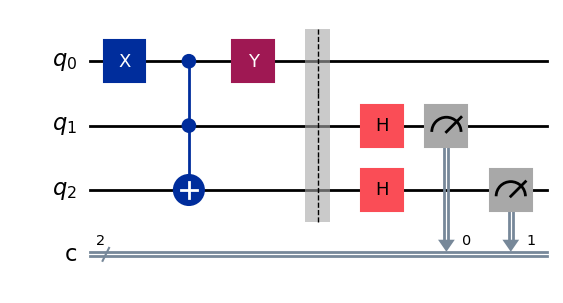

In [2]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(3,2) # QuantumCircuit(num. bits quânticos, num. bits clássicos)

qc.x(0)
qc.ccx(0,1,2)
qc.y(0)
qc.barrier()
qc.h(1)
qc.h(2)
qc.measure(1,0) # É possível medir epecificamente um qubit: measure(qubit,bit clássico)
qc.measure(2,1)

qc.draw('mpl')

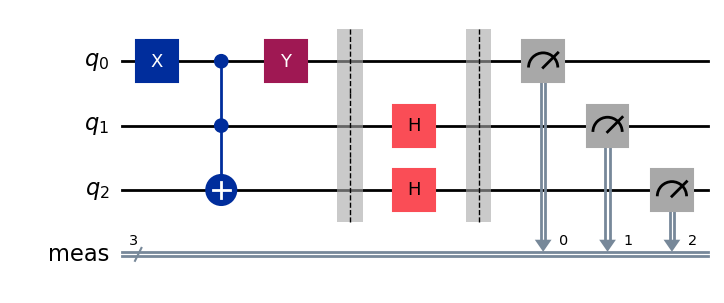

In [3]:
qc = QuantumCircuit(3) # Não passamos nenhum bit clássico

qc.x(0)
qc.ccx(0,1,2)
qc.y(0)
qc.barrier()
qc.h(1)
qc.h(2)
qc.measure_all() # É possível medir todos os qubits de uma vez

qc.draw('mpl')

#2. Operadores básicos

Operadores básicos de um qubit:

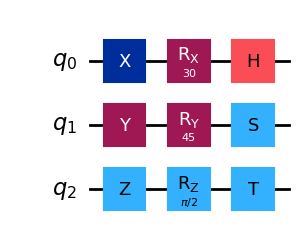

In [4]:

qc = QuantumCircuit(3)

#matrizes de pauli
qc.x(0)
qc.y(1)
qc.z(2)

#rotações parametrizadas - r_ (ângulo, posicão)
qc.rx(30,0)
qc.ry(45,1)
qc.rz(np.pi/2,2)

#hadamard gate
qc.h(0)

#outras portas
qc.s(1)
qc.t(2)

qc.draw('mpl')

Implementando operadores controlados:

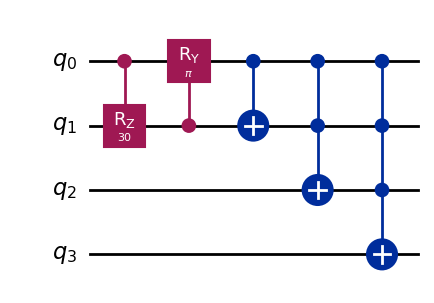

In [5]:
qc = QuantumCircuit(4)

#rotações controladas - cr_ (angulo, controle, alvo)
qc.crz(30,0,1)
qc.cry(np.pi,1,0)

#porta CNOT - cx(controle, alvo)
qc.cx(0,1)

#porta Tofolli - ccx (controles, alvo)
qc.ccx(0,1,2)

#CNOT multicontrolada - mcx([lista de controles], alvo)
qc.mcx([0,1,2],3)

qc.draw('mpl')

Implementando quaisquer operadores:

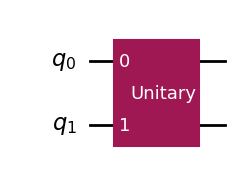

In [6]:
circuit = QuantumCircuit(2)

matrix = [[0, 0, 0, 1],
          [0, 0, 1, 0],
          [1, 0, 0, 0],
          [0, 1, 0, 0]]

circuit.unitary(matrix, [0 ,1]) # unitary([[matriz]], [lista de bits])
circuit.draw('mpl')

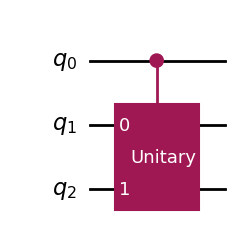

In [7]:
from qiskit.circuit.library import UnitaryGate

circuit = QuantumCircuit(3)

matrix = [[0, 0, 0, 1],
          [0, 0, 1, 0],
          [1, 0, 0, 0],
          [0, 1, 0, 0]]

gate = UnitaryGate(matrix)
cGate = gate.control(1)
circuit.append(cGate, [0, 1, 2]) # append(operador, [controles, alvos])
circuit.draw('mpl')

## 3. Transformando um circuito em um operador

Podemos transformar um circuito quântico em uma espécide de black box.

In [66]:
c = QuantumCircuit(3)

c.x(0)
c.x(1)
c.h(2)

c.ccx(0,1,2)

gate = c.to_gate(label='Death Note')

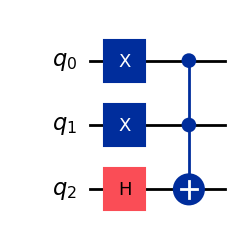

In [67]:
c.draw('mpl')

Agora, podemos aplicá-lo:

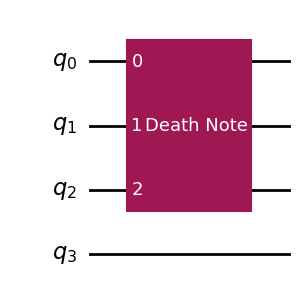

In [68]:
qc = QuantumCircuit(4)
qc.append(gate, [0,1,2])
qc.draw('mpl')

Também podemos controlá-lo:

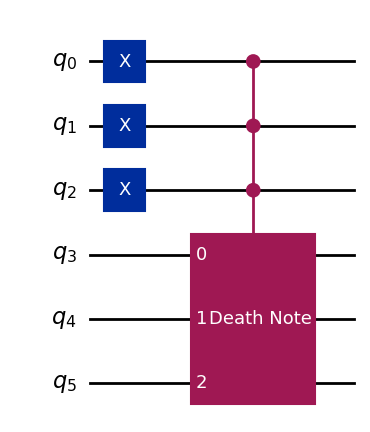

In [69]:
qc = QuantumCircuit(6)
cGate = gate.control(3)
qc.x(0)
qc.x(1)
qc.x(2)
qc.append(cGate, [0,1,2,3,4,5])
qc.draw('mpl')


## 4. Simulando o nosso circuito

Vamos tentar simular o circuito acima:

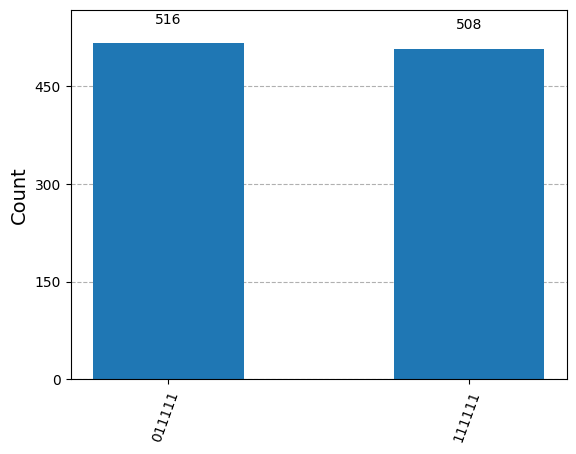

In [70]:
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
from qiskit import transpile

sim = Aer.get_backend('aer_simulator')

qc.measure_all()
qc = transpile(qc, basis_gates=['u', 'cx']) # o simulador nao consegue trabalhar com a caixa-preta,
                                            # precisamos decompor o circuito em operadores mais simples
                                            # não precisaríamos da transpilação se o circuito fosse simples

counts = sim.run(qc).result().get_counts()
plot_histogram(counts)

In [51]:
#Circuito após a transpilação
#qc.draw('mpl')